# <font color=darkblue>Data Cleaning </font>

In [2]:
#importation des bibliothéques
import json
import csv
import pandas as pd
import re
import spacy
from spacy.matcher import Matcher 
from spacy.lang.fr.examples import sentences 
from spacy import displacy 
import visualise_spacy_tree
from IPython.display import Image, display
import pytextrank
from collections import Counter
from string import punctuation

In [3]:
#transformation du fichier JSON en dataframe
data = pd.read_json (r'all_data.json')
data.to_csv (r'all_data.csv', index = None)

In [4]:
data

,link,reference,dateAnnonce,price,superficie_habitable,superficie_terrain,codeP,gouvernorat,delegation,localite,...,salle_de_bain,constructible,service,chauffage,climatisation,cuisine,installations_sportives,tel,agence,description
0,http://www.tunisie-annonce.com/DetailsAnnonceI...,3031581,17/06/2019,810 888 Dinar Tunisien (TND) \r\n\t\t,177 m²,None,None,Tunis,La Marsa,Gammart,...,None,None,None,None,None,None,None,"[98788002, 98788002]",None,"\nsybaris immobilier, agence immobilière situ..."
1,http://www.tunisie-annonce.com/DetailsAnnonceI...,3111266,23/09/2019,3 000 000 Dinar Tunisien (TND) \r\n\t\t,850 m²,None,None,Tunis,La Marsa,Marsa Ennassim,...,None,None,None,None,None,None,None,"[+216 70 253 040, +216 98 788 002]",None,"\nsybaris immobilier, agence immobilière situ..."
2,http://www.tunisie-annonce.com/DetailsAnnonceI...,3246220,27/07/2020,210 000 Dinar Tunisien (TND) \r\n\t\t,170 m²,None,None,Nabeul,Hammamet,Barraket Essahel,...,None,None,None,None,None,None,None,[+216 53 621 028],None,"\ncause départ , à vendre à manaret el hammam..."
3,http://www.tunisie-annonce.com/DetailsAnnonceI...,3129108,25/10/2019,620 000 Dinar Tunisien (TND) \r\n\t\t,150 m²,None,None,Tunis,La Marsa,Berge Du Lac,...,None,None,None,None,None,None,None,"[99267678, 22524081]",None,\na vendre au lac 2 pour 620000 dt un s plus ...
4,http://www.tunisie-annonce.com/DetailsAnnonceI...,3147239,18/11/2019,720 000 Dinar Tunisien (TND) \r\n\t\t,207 m²,None,None,Ariana,Ariana Ville,Cite Ennasr 2,...,None,None,None,None,None,None,None,"[99267678, 22524081]",None,\na vendre a ennasr 2 pour 720000 dt un duple...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33686,https://www.tunisieimmob.net/annonces/kerkenna...,18823,"\n\t\t\t\t \n, 25 septembre , 2017 ...","910,000 TND",400 m,870 m,None,Kerkenah,None,None,...,None,None,None,None,None,None,None,None,None,"En exclusivité, magnifique propriété pieds dan..."
33687,https://www.tunisieimmob.net/annonces/3-appart...,18960,"\n\t\t\t\t \n, 26 septembre , 2017 ...",None,None,None,4042,Sousse,None,None,...,None,None,None,None,None,None,None,None,contact@tunisieimmob.net,On met à la vente 3 appartements hauts standin...
33688,https://www.tunisieimmob.net/annonces/merveill...,18927,"\n\t\t\t\t \n, 26 septembre , 2017 ...","240,000 TND",None,None,4042,Sousse,None,None,...,None,None,None,None,None,None,None,None,contact@tunisieimmob.net,A vendre un chic S+1 entièrement meublé d’une ...
33689,https://www.tunisieimmob.net/annonces/appartem...,18938,"\n\t\t\t\t \n, 26 septembre , 2017 ...","250,000 TND",None,None,4089,Sousse,None,None,...,None,None,None,None,None,None,None,None,contact@tunisieimmob.net,"A VENDRE un appartement de superficie 140m² , ..."


In [5]:
#structure du dataframe
data.shape

(33691, 26)

<font  color=black> **=> On a 33691 lignes et 26 features** </font>

In [6]:
#10 premiers lignes
data.head(10)

,link,reference,dateAnnonce,price,superficie_habitable,superficie_terrain,codeP,gouvernorat,delegation,localite,...,salle_de_bain,constructible,service,chauffage,climatisation,cuisine,installations_sportives,tel,agence,description
0,http://www.tunisie-annonce.com/DetailsAnnonceI...,3031581,17/06/2019,810 888 Dinar Tunisien (TND) \r\n\t\t,177 m²,None,None,Tunis,La Marsa,Gammart,...,None,None,None,None,None,None,None,"[98788002, 98788002]",None,"\nsybaris immobilier, agence immobilière situ..."
1,http://www.tunisie-annonce.com/DetailsAnnonceI...,3111266,23/09/2019,3 000 000 Dinar Tunisien (TND) \r\n\t\t,850 m²,None,None,Tunis,La Marsa,Marsa Ennassim,...,None,None,None,None,None,None,None,"[+216 70 253 040, +216 98 788 002]",None,"\nsybaris immobilier, agence immobilière situ..."
2,http://www.tunisie-annonce.com/DetailsAnnonceI...,3246220,27/07/2020,210 000 Dinar Tunisien (TND) \r\n\t\t,170 m²,None,None,Nabeul,Hammamet,Barraket Essahel,...,None,None,None,None,None,None,None,[+216 53 621 028],None,"\ncause départ , à vendre à manaret el hammam..."
3,http://www.tunisie-annonce.com/DetailsAnnonceI...,3129108,25/10/2019,620 000 Dinar Tunisien (TND) \r\n\t\t,150 m²,None,None,Tunis,La Marsa,Berge Du Lac,...,None,None,None,None,None,None,None,"[99267678, 22524081]",None,\na vendre au lac 2 pour 620000 dt un s plus ...
4,http://www.tunisie-annonce.com/DetailsAnnonceI...,3147239,18/11/2019,720 000 Dinar Tunisien (TND) \r\n\t\t,207 m²,None,None,Ariana,Ariana Ville,Cite Ennasr 2,...,None,None,None,None,None,None,None,"[99267678, 22524081]",None,\na vendre a ennasr 2 pour 720000 dt un duple...
5,http://www.tunisie-annonce.com/DetailsAnnonceI...,2233296,09/03/2016,130 000 Dinar Tunisien (TND) \r\n\t\t,87 m²,None,None,Ben arous,El Mourouj,El Mourouj,...,None,None,None,None,None,None,None,"[20865868, 20865868, 71364010]",None,\navendre appt amourouje 1 2eme ettaje (87m2)...
6,http://www.tunisie-annonce.com/DetailsAnnonceI...,3226927,22/05/2020,120 000 Dinar Tunisien (TND) \r\n\t\t,80 m²,None,None,Ben arous,Hammam Lif,Hammam Lif,...,None,None,None,None,None,None,None,"[+216 93 731 099, +216 20 009 291, +216 90 252...",None,\nà vendre un bel appartement salon deux cham...
7,http://www.tunisie-annonce.com/DetailsAnnonceI...,3246201,26/07/2020,430 000 Dinar Tunisien (TND) \r\n\t\t,230 m²,None,None,Tunis,La Marsa,Cite Erriadh,...,None,None,None,None,None,None,None,[+216 29 372 570],None,\nvend pour particulier une étage de villa av...
8,http://www.tunisie-annonce.com/DetailsAnnonceI...,3097267,31/08/2019,125 000 Dinar Tunisien (TND) \r\n\t\t,80 m²,None,None,Ben arous,El Mourouj,El Mourouj,...,None,None,None,None,None,None,None,"[+216 93 731 099, +216 20 009 291, +216 90 252...",None,\na vendre un appartement s plus 2 a mourouj ...
9,http://www.tunisie-annonce.com/DetailsAnnonceI...,3238838,20/06/2020,480 000 Dinar Tunisien (TND) \r\n\t\t,187 m²,None,None,Tunis,Ain Zaghouan,Jardins de Carthage,...,None,None,None,None,None,None,None,"[99267678, 22524081]",None,\na vendre aux jardins de carthage pour 48000...


In [7]:
#10 derniers lignes
data.tail(10)

,link,reference,dateAnnonce,price,superficie_habitable,superficie_terrain,codeP,gouvernorat,delegation,localite,...,salle_de_bain,constructible,service,chauffage,climatisation,cuisine,installations_sportives,tel,agence,description
33681,https://www.tunisieimmob.net/annonces/appartem...,18861,"\n\t\t\t\t \n, 26 septembre , 2017 ...","240,000 TND",None,None,4000,Sousse,None,None,...,None,None,None,None,None,None,None,None,contact@tunisieimmob.net,Appartement de très haut standing(s+2)100 m²sp...
33682,https://www.tunisieimmob.net/annonces/palm-lak...,18848,"\n\t\t\t\t \n, 25 septembre , 2017 ...",None,None,None,5000,Monastir,None,None,...,None,None,None,None,None,None,None,None,dcgenerale@gmail.com,UNE NOUVELLE FAÇON DE S’ÉPANOUIR \n\nPALM LAKE...
33683,https://www.tunisieimmob.net/annonces/immobili...,18871,"\n\t\t\t\t \n, 26 septembre , 2017 ...","165,000 TND",None,None,4000,Sousse,None,None,...,None,None,None,None,None,None,None,None,contact@tunisieimmob.net,Très beau appartement chez Diar Ennassim Souss...
33684,https://www.tunisieimmob.net/annonces/ferme-su...,18838,"\n\t\t\t\t \n, 25 septembre , 2017 ...","680,000 TND",400 m,"7,500 m",8010,Nabeul,None,None,...,None,Constructible,None,None,None,None,None,53553951,None,"Ferme sur route à 2 km de Menzel Bouzelfa, ST ..."
33685,https://www.tunisieimmob.net/annonces/des-appa...,18873,"\n\t\t\t\t \n, 26 septembre , 2017 ...",None,None,None,4089,Sousse,None,None,...,None,None,None,None,None,None,None,None,contact@tunisieimmob.net,"A VENDRE à des prix promotionnels, prés de sov..."
33686,https://www.tunisieimmob.net/annonces/kerkenna...,18823,"\n\t\t\t\t \n, 25 septembre , 2017 ...","910,000 TND",400 m,870 m,None,Kerkenah,None,None,...,None,None,None,None,None,None,None,None,None,"En exclusivité, magnifique propriété pieds dan..."
33687,https://www.tunisieimmob.net/annonces/3-appart...,18960,"\n\t\t\t\t \n, 26 septembre , 2017 ...",None,None,None,4042,Sousse,None,None,...,None,None,None,None,None,None,None,None,contact@tunisieimmob.net,On met à la vente 3 appartements hauts standin...
33688,https://www.tunisieimmob.net/annonces/merveill...,18927,"\n\t\t\t\t \n, 26 septembre , 2017 ...","240,000 TND",None,None,4042,Sousse,None,None,...,None,None,None,None,None,None,None,None,contact@tunisieimmob.net,A vendre un chic S+1 entièrement meublé d’une ...
33689,https://www.tunisieimmob.net/annonces/appartem...,18938,"\n\t\t\t\t \n, 26 septembre , 2017 ...","250,000 TND",None,None,4089,Sousse,None,None,...,None,None,None,None,None,None,None,None,contact@tunisieimmob.net,"A VENDRE un appartement de superficie 140m² , ..."
33690,https://www.tunisieimmob.net/annonces/appartem...,None,NA,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,


In [8]:
#détection des valeurs null
data.isnull().values.any() 

True

In [9]:
#nombre des valeurs null
data.isnull().sum().sum()

563709

<font  color=black> **=> On a 563709 champ null** </font>

In [10]:
#les colonnes du dataframe
data.columns

Index(['link', 'reference', 'dateAnnonce', 'price', 'superficie_habitable',
       'superficie_terrain', 'codeP', 'gouvernorat', 'delegation', 'localite',
       'adresse', 'anneeConst', 'nbpiece', 'typeImm', 'fonds', 'plein_air',
       'salle_de_bain', 'constructible', 'service', 'chauffage',
       'climatisation', 'cuisine', 'installations_sportives', 'tel', 'agence',
       'description'],
      dtype='object')

In [11]:
#info dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33691 entries, 0 to 33690
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   link                     33691 non-null  object 
 1   reference                11136 non-null  object 
 2   dateAnnonce              28675 non-null  object 
 3   price                    30347 non-null  object 
 4   superficie_habitable     12847 non-null  object 
 5   superficie_terrain       9348 non-null   object 
 6   codeP                    1951 non-null   object 
 7   gouvernorat              6790 non-null   object 
 8   delegation               4979 non-null   object 
 9   localite                 4295 non-null   object 
 10  adresse                  29599 non-null  object 
 11  anneeConst               850 non-null    object 
 12  nbpiece                  13589 non-null  object 
 13  typeImm                  28946 non-null  object 
 14  fonds                 

# <font  color=red> => dans cette partie a seulement intérêt aux features Climatisation / Fonds / Salle De Bain / Description </font>

In [12]:
#extraction des features
newdata=data[[ 'climatisation', 'fonds' , 'salle_de_bain' , 'description']]

In [13]:
#nouveau dataframe
newdata

,climatisation,fonds,salle_de_bain,description
0,None,None,None,"\nsybaris immobilier, agence immobilière situ..."
1,None,None,None,"\nsybaris immobilier, agence immobilière situ..."
2,None,None,None,"\ncause départ , à vendre à manaret el hammam..."
3,None,None,None,\na vendre au lac 2 pour 620000 dt un s plus ...
4,None,None,None,\na vendre a ennasr 2 pour 720000 dt un duple...
...,...,...,...,...
33686,None,None,None,"En exclusivité, magnifique propriété pieds dan..."
33687,None,None,None,On met à la vente 3 appartements hauts standin...
33688,None,None,None,A vendre un chic S+1 entièrement meublé d’une ...
33689,None,None,None,"A VENDRE un appartement de superficie 140m² , ..."


In [14]:
#info new data
newdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33691 entries, 0 to 33690
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   climatisation  289 non-null    object
 1   fonds          1836 non-null   object
 2   salle_de_bain  7956 non-null   object
 3   description    33688 non-null  object
dtypes: object(4)
memory usage: 1.0+ MB


In [15]:
#newdata['reference']=newdata['reference'].astype(str)
#newdata['climatisation']=newdata['climatisation'].astype(str)
#newdata['fonds']=newdata['fonds'].astype(str)
#newdata['salle_de_bain']=newdata['salle_de_bain'].astype(str)
#newdata['description']=newdata['description'].astype(str)

In [16]:
#statistique champ description
test1=newdata['description'].isnull().value_counts()

<AxesSubplot:>

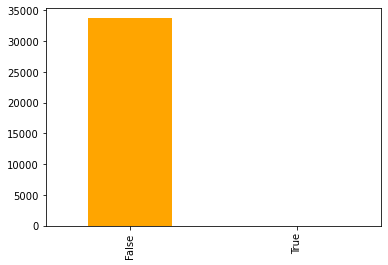

In [17]:
test1.plot.bar(color="orange")

In [18]:
#détection des valeurs null du champ description
newdata['description'].isnull().value_counts()

False    33688
True         3
Name: description, dtype: int64

In [19]:
#index des champs null
newdata[newdata['description'].isnull()].index.tolist()

[4570, 4583, 4794]

In [20]:
#conversion
newdata = newdata[newdata['description'].notna()]

In [21]:
newdata['description'].isnull().value_counts()

False    33688
Name: description, dtype: int64

In [22]:
newdata[newdata['description'].isnull()].index.tolist()

[]

In [23]:
#statistique climatisation
test2=newdata['climatisation'].isnull().value_counts()

<AxesSubplot:>

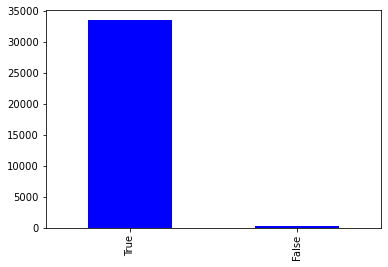

In [24]:
test2.plot.bar(color="blue")

In [25]:
#statistique fonds
test3=newdata['fonds'].isnull().value_counts()

<AxesSubplot:>

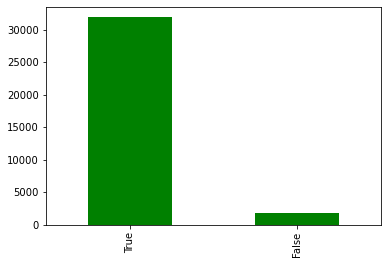

In [26]:
test3.plot.bar(color="green")

In [27]:
#statistique salle de bain
test4=newdata['salle_de_bain'].isnull().value_counts()

<AxesSubplot:>

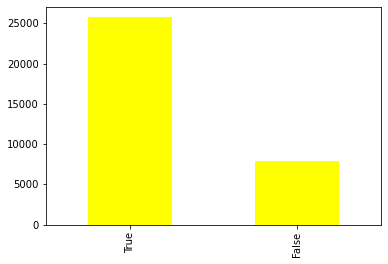

In [28]:
test4.plot.bar(color="yellow")

<font  color=black> **=> On constate que le champ description ne contient pas des valeurs null mais pour les autres features , la plupart des données sont manquants** </font>

# <font color=darkblue>Prédiction </font>

In [29]:
#conversion du champ description en String
newdata["description"]=newdata["description"].astype(str)

C:\Users\Houssem Ouerdiane\AppData\Local\Temp\ipykernel_15668\4253316461.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdata["description"]=newdata["description"].astype(str)


In [30]:
#fonction qui permet de nettoyer le test (a ne pas utiliser)

# function to preprocess speech
#def clean(text):
    
    # removing paragraph numbers
#    text = re.sub('[0-9]+.\t','',str(text))
    # removing new line characters
#    text = re.sub('\n ','',str(text))
#    text = re.sub('\n',' ',str(text))
    # removing apostrophes
#    text = re.sub("'s",'',str(text))
    # removing hyphens
#    text = re.sub("-",' ',str(text))
#    text = re.sub("— ",'',str(text))
    # removing quotation marks
#    text = re.sub('\"','',str(text))
    # removing salutations
#    text = re.sub("Mr\.",'Mr',str(text))
#    text = re.sub("Mrs\.",'Mrs',str(text))
    # removing any reference to outside text
#    text = re.sub("[\(\[].*?[\)\]]", "", str(text))
    
#    return text

# preprocessing speeches
#newdata['description_clean'] = newdata['description'].apply(clean)

In [31]:
#fonction qui va nous permettre de diviser le champ description en des phrases
def sentences(text):
    # split sentences and questions
    text = re.split('[.?]', text)
    clean_sent = []
    for sent in text:
        clean_sent.append(sent)
    return clean_sent

# sentences
newdata['sent'] = newdata['description'].apply(sentences)

C:\Users\Houssem Ouerdiane\AppData\Local\Temp\ipykernel_15668\1880154251.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdata['sent'] = newdata['description'].apply(sentences)


In [32]:
#notre nouveau dataframe avec le champ sentences
newdata

,climatisation,fonds,salle_de_bain,description,sent
0,None,None,None,"\nsybaris immobilier, agence immobilière situ...","[ \nsybaris immobilier, agence immobilière sit..."
1,None,None,None,"\nsybaris immobilier, agence immobilière situ...","[ \nsybaris immobilier, agence immobilière sit..."
2,None,None,None,"\ncause départ , à vendre à manaret el hammam...","[ \ncause départ , à vendre à manaret el hamma..."
3,None,None,None,\na vendre au lac 2 pour 620000 dt un s plus ...,[ \na vendre au lac 2 pour 620000 dt un s plus...
4,None,None,None,\na vendre a ennasr 2 pour 720000 dt un duple...,[ \na vendre a ennasr 2 pour 720000 dt un dupl...
...,...,...,...,...,...
33686,None,None,None,"En exclusivité, magnifique propriété pieds dan...","[En exclusivité, magnifique propriété pieds da..."
33687,None,None,None,On met à la vente 3 appartements hauts standin...,[On met à la vente 3 appartements hauts standi...
33688,None,None,None,A vendre un chic S+1 entièrement meublé d’une ...,[A vendre un chic S+1 entièrement meublé d’une...
33689,None,None,None,"A VENDRE un appartement de superficie 140m² , ...","[A VENDRE un appartement de superficie 140m² ,..."


In [33]:
#on va utiliser la bibliothéque spacy
# load english language model
nlp = spacy.load("fr_core_news_md")

In [34]:
#!python -m spacy download fr_core_news_md

In [35]:
#!python -m spacy validate

In [36]:
#!python -m spacy download fr_core_news_sd

In [37]:
newdata

,climatisation,fonds,salle_de_bain,description,sent
0,None,None,None,"\nsybaris immobilier, agence immobilière situ...","[ \nsybaris immobilier, agence immobilière sit..."
1,None,None,None,"\nsybaris immobilier, agence immobilière situ...","[ \nsybaris immobilier, agence immobilière sit..."
2,None,None,None,"\ncause départ , à vendre à manaret el hammam...","[ \ncause départ , à vendre à manaret el hamma..."
3,None,None,None,\na vendre au lac 2 pour 620000 dt un s plus ...,[ \na vendre au lac 2 pour 620000 dt un s plus...
4,None,None,None,\na vendre a ennasr 2 pour 720000 dt un duple...,[ \na vendre a ennasr 2 pour 720000 dt un dupl...
...,...,...,...,...,...
33686,None,None,None,"En exclusivité, magnifique propriété pieds dan...","[En exclusivité, magnifique propriété pieds da..."
33687,None,None,None,On met à la vente 3 appartements hauts standin...,[On met à la vente 3 appartements hauts standi...
33688,None,None,None,A vendre un chic S+1 entièrement meublé d’une ...,[A vendre un chic S+1 entièrement meublé d’une...
33689,None,None,None,"A VENDRE un appartement de superficie 140m² , ...","[A VENDRE un appartement de superficie 140m² ,..."


In [38]:
#fonction 1
nlp = spacy.load("fr_core_news_md")
def get_hotwords(text):
    result = []
    pos_tag = ['PROPN', 'ADJ', 'NOUN'] 
    doc = nlp(text.lower()) 
    for token in doc:
        if(token.text in nlp.Defaults.stop_words or token.text in punctuation):
            continue
        if(token.pos_ in pos_tag):
            result.append(token.text)
    return result

In [39]:
#test fonction 1
new_text = newdata["description"][500]
output = set(get_hotwords(new_text))
most_common_list = Counter(output).most_common()
for item in most_common_list:
  print(item[0])

invités
villa
jardin
immobilière
suite
offres
bain
ref
sol
mvv0089
pièces
niveaux
extérieur
rez
similaires
garage
séjour
standing
chaussée
salon
croisette
chambre
étage
terrasse
bâtisse
eau
haut
studio
piscine
suites
dressing
coucher
vente
grand
cuisine
salle
belle
climatisées


In [40]:
# fonction 2
text = "Compatibility of systems of linear constraints over the set of natural numbers. Criteria of compatibility of a system of linear Diophantine equations, strict inequations, and nonstrict inequations are considered. Upper bounds for components of a minimal set of solutions and algorithms of construction of minimal generating sets of solutions for all types of systems are given. These criteria and the corresponding algorithms for constructing a minimal supporting set of solutions can be used in solving all the considered types systems and systems of mixed types."
# load a spaCy model, depending on language, scale, etc.
nlp = spacy.load("fr_core_news_md")
# add PyTextRank to the spaCy pipeline
nlp.add_pipe("textrank")
doc = nlp(text)
# examine the top-ranked phrases in the document
for phrase in doc._.phrases[:10]:
    print(phrase.text)

types
solutions
set
algorithms
of solutions
generating sets
Compatibility
Diophantine
equations
a minimal supporting


In [41]:
#test fonction 2
text=newdata["description"][500]
doc = nlp(text)
# examine the top-ranked phrases in the document
for phrase in doc._.phrases[:]:
    print(phrase.text)

piscine
coucher
dressing
eau
bain
séjour
terrasse
garage
climatisées
, salle
une salle
un grand salon
une grand salon
chaussée
rez
très haut standing
le piscine
deux suites
une suite
une belle villa
les invités
une cuisine
merci
une chambre
la croisette immobilière
un studio, une cuisine entièrement équipée
trois niveaux
 
la croisette immobilière
 
*
la vente
 
ref
lextérieur
létage
les pièces
 
pour les offres similaires
la bâtisse
 
sous sol
la soukra
soukra
vous


In [42]:
#fonction qui va nous permettre de remplir le champ climatisation
index=0
for column in newdata["sent"]:
    for x in range(len(column)):
            sentence = column[x]
            words = sentence.split()
            for word in words:
                if (word=="climatisation" or word=="climatiseur" or word=="ventilation"):
                    #print(sentence)
                    #print(index)
                    newdata["climatisation"][index] = sentence
    index=index+1

C:\Users\Houssem Ouerdiane\AppData\Local\Temp\ipykernel_15668\423597028.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdata["climatisation"][index] = sentence


In [43]:
#fonction qui va nous permettre de remplir le champ fonds
index=0
for column in newdata["sent"]:
    for x in range(len(column)):
            sentence = column[x]
            words = sentence.split()
            for word in words:
                if (word=="parking"):
                    #print(sentence)
                    #print(index)
                    newdata["fonds"][index] = sentence
    index=index+1

C:\Users\Houssem Ouerdiane\AppData\Local\Temp\ipykernel_15668\2695651208.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdata["fonds"][index] = sentence
C:\Users\Houssem Ouerdiane\AppData\Local\Temp\ipykernel_15668\2695651208.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdata["fonds"][index] = sentence


In [44]:
#fonction qui va nous permettre de remplir le champ salle de bain
index=0
for column in newdata["sent"]:
    for x in range(len(column)):
            sentence = column[x]
            words = sentence.split()
            for word in words:
                if (word=="bain"):
                    #print(sentence)
                    #print(index)
                    newdata["salle_de_bain"][index] = sentence
    index=index+1

C:\Users\Houssem Ouerdiane\AppData\Local\Temp\ipykernel_15668\3404824910.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdata["salle_de_bain"][index] = sentence
C:\Users\Houssem Ouerdiane\AppData\Local\Temp\ipykernel_15668\3404824910.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdata["salle_de_bain"][index] = sentence
C:\Users\Houssem Ouerdiane\AppData\Local\Temp\ipykernel_15668\3404824910.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returnin

In [45]:
#version finale de notre dataframe
newdata

,climatisation,fonds,salle_de_bain,description,sent
0,None,None,\nl'appartement se compose comme suit : \n...,"\nsybaris immobilier, agence immobilière situ...","[ \nsybaris immobilier, agence immobilière sit..."
1,None,None,"\nsybaris immobilier, agence immobilière situ...","\nsybaris immobilier, agence immobilière situ...","[ \nsybaris immobilier, agence immobilière sit..."
2,None,"\ncause départ , à vendre à manaret el hammam...",None,"\ncause départ , à vendre à manaret el hammam...","[ \ncause départ , à vendre à manaret el hamma..."
3,\na vendre au lac 2 pour 620000 dt un s plus ...,\na vendre au lac 2 pour 620000 dt un s plus ...,\na vendre au lac 2 pour 620000 dt un s plus ...,\na vendre au lac 2 pour 620000 dt un s plus ...,[ \na vendre au lac 2 pour 620000 dt un s plus...
4,None,\na vendre a ennasr 2 pour 720000 dt un duple...,\na vendre a ennasr 2 pour 720000 dt un duple...,\na vendre a ennasr 2 pour 720000 dt un duple...,[ \na vendre a ennasr 2 pour 720000 dt un dupl...
...,...,...,...,...,...
33686,"l’appartement est équipé de store électrique,...",None,"A VENDRE un appartement de superficie 140m² , ...","En exclusivité, magnifique propriété pieds dan...","[En exclusivité, magnifique propriété pieds da..."
33687,None,None,None,On met à la vente 3 appartements hauts standin...,[On met à la vente 3 appartements hauts standi...
33688,None,None,None,A vendre un chic S+1 entièrement meublé d’une ...,[A vendre un chic S+1 entièrement meublé d’une...
33689,None,None,None,"A VENDRE un appartement de superficie 140m² , ...","[A VENDRE un appartement de superficie 140m² ,..."


In [46]:
#quelques affichages
newdata["salle_de_bain"][3]

" \na vendre au lac 2 pour 620000 dt un s plus 3 (150m) haut standing avec terrasse de 70m, chauffage central , climatisation , une salle de bain et une salle d'eau , placards , parking sous sol , titre bleu (wb1240)"

In [47]:
newdata["fonds"][3]

" \na vendre au lac 2 pour 620000 dt un s plus 3 (150m) haut standing avec terrasse de 70m, chauffage central , climatisation , une salle de bain et une salle d'eau , placards , parking sous sol , titre bleu (wb1240)"

In [48]:
newdata["climatisation"][3]

" \na vendre au lac 2 pour 620000 dt un s plus 3 (150m) haut standing avec terrasse de 70m, chauffage central , climatisation , une salle de bain et une salle d'eau , placards , parking sous sol , titre bleu (wb1240)"